In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('../data/resale-flat-prices.csv')
df['date'] = pd.to_datetime(df['month'], format = '%Y-%m')
df = df.loc[(df['town'] == 'CENTRAL AREA') & (df['date'].between('2017-01-01', '2021-12-01'))]

In [32]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,date
299,2017-01,CENTRAL AREA,2 ROOM,9,JLN KUKOH,04 TO 06,55.0,Improved,1982,64 years,250000.0,2017-01-01
300,2017-01,CENTRAL AREA,3 ROOM,640,ROWELL RD,01 TO 03,84.0,Model A,1984,66 years 05 months,360000.0,2017-01-01
301,2017-01,CENTRAL AREA,3 ROOM,264,WATERLOO ST,16 TO 18,68.0,Improved,1986,68 years 09 months,400000.0,2017-01-01
302,2017-01,CENTRAL AREA,3 ROOM,32,NEW MKT RD,07 TO 09,66.0,Standard,1983,65 years 03 months,428000.0,2017-01-01
303,2017-01,CENTRAL AREA,3 ROOM,5,TG PAGAR PLAZA,07 TO 09,59.0,Improved,1977,59 years 01 month,455000.0,2017-01-01


## Number of Sales Over Time

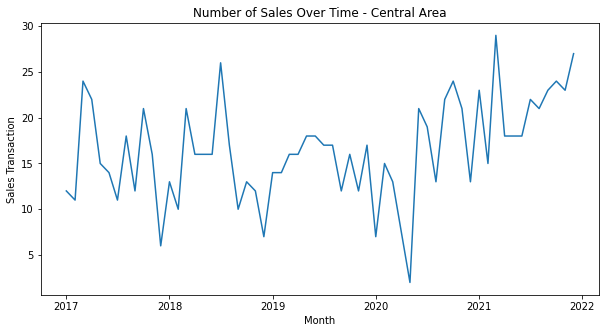

In [34]:
sales_over_time = df.groupby('date', as_index = False).agg({'resale_price':'count'}).rename(columns = {'resale_price':'resale_count'})
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.lineplot(data = sales_over_time, x = 'date', y = 'resale_count')
ax.set_xlabel('Month')
ax.set_ylabel('Sales Transaction')
ax.set_title('Number of Sales Over Time - Central Area')
plt.show()

## Price Over Time

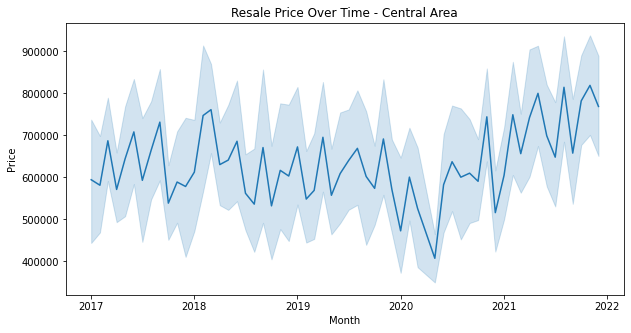

In [35]:
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.lineplot(data = df, x = 'date', y = 'resale_price')
ax.set_xlabel('Month')
ax.set_ylabel('Price')
ax.set_title('Resale Price Over Time - Central Area')
plt.show()

## Price Distribution By Flat Type

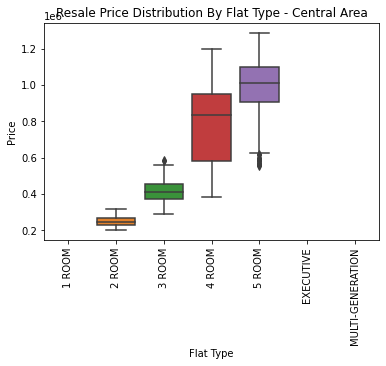

In [36]:
xaxis_order =['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']
ax = sns.boxplot(data = df, x = 'flat_type', y = 'resale_price', order = xaxis_order)
ax.set_xlabel('Flat Type')
ax.set_ylabel('Price')
ax.set_title('Resale Price Distribution By Flat Type - Central Area')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()